In [9]:
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.display import display
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 999


In [10]:
def execute_query(sparqlQuery):
    sparql = SPARQLWrapper("http://localhost:8082/sparql")
    sparql.setQuery(sparqlQuery)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    results_df = json_normalize(results["results"]["bindings"])
    # results_df = results_df[results_df['o.type'] == "uri"]
    # results_df = results_df.drop(['o.datatype','o.type', 'o.xml:lang','p.type'],axis=1)
    # results_df = results_df[['p.value','o.value','countS.value']]
    # results_df['countS.value'] = results_df['countS.value'].astype(int)
    # results_df = results_df[results_df['countS.value'] > 1]
    return results_df


### General Graph queries

The following queries shows the general graph queries that shows major trends across various parameters. We look at the following queries one by one:

1. Publications by year across all conferences

[Text(0, 0.5, 'Publication Counts'), Text(0.5, 0, 'Years')]

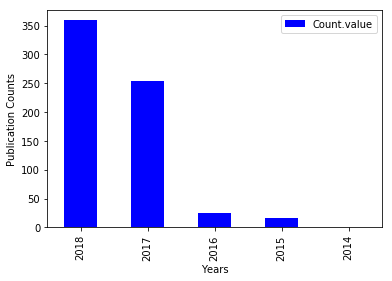

In [13]:
### Number of publications by year across all conferences
yearCount = """
Select count(distinct ?s) as ?Count ?year  where {


?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?o .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .


}Group by ?year ORDER by DESC(?year)


"""


results_df = execute_query(yearCount)
results_df = results_df.drop(['Count.datatype', 'Count.type',  'year.datatype',
       'year.type'],axis=1)
results_df.columns
results_df.head()


results_df = results_df.astype(int)


ax = results_df.plot(kind='bar',x='year.value',y='Count.value',color='blue')
ax.set(xlabel = "Years", ylabel = "Publication Counts")

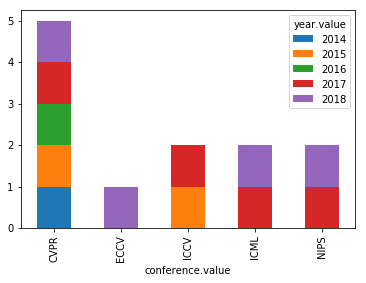

In [14]:
#### Number of publications by conference series and by year

conferenceyear = """

Select count(distinct ?s) as ?Count ?conference ?year  where {


?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .


}

"""
results_df = execute_query(conferenceyear)
results_df.columns
results_df = results_df.drop(['Count.datatype', 'Count.type',  'conference.type','year.datatype',
       'year.type'],axis=1)
results_df.head()
results_df["Count.value"] = pd.to_numeric(results_df["Count.value"])
results_df["year.value"] = pd.to_numeric(results_df["year.value"])
results_df.groupby(['conference.value','year.value']).size().unstack().plot(kind='bar',stacked='True')
plt.show()

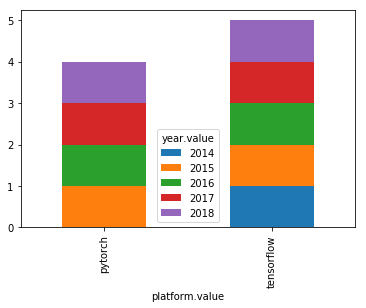

In [15]:
### Year and platform
platformyear = """

Select count(?platform) as ?countplatform ?platform ?year where {


?s a <https://github.com/deepcurator/DCC/Publication> .
?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .
?s <https://github.com/deepcurator/DCC/platform> ?platform .

} 
group by  ?platform ?year order by DESC(?year)

"""

results_df = execute_query(platformyear)
results_df.columns
results_df = results_df.drop(['countplatform.datatype', 'countplatform.type', 'platform.type' ,'year.datatype','year.type'],axis=1)
results_df.head()
results_df.groupby(['platform.value','year.value']).size().unstack().plot(kind='bar',stacked='True')
plt.show()



[Text(0, 0.5, 'Count'), Text(0.5, 0, 'TF Functions')]

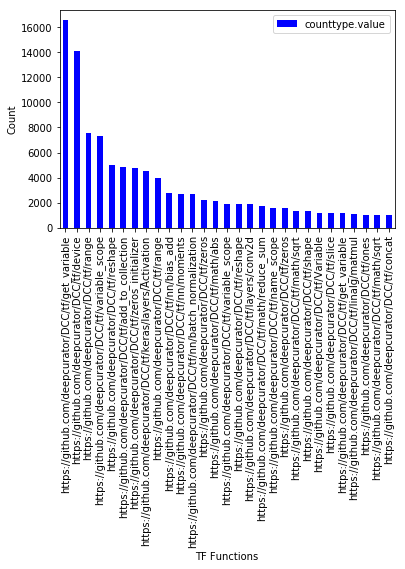

In [16]:
#### Function trends across conferences 

functiontrends = """

Select count(?type) as ?counttype  ?type  ?conference where {

?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .
?s <https://github.com/deepcurator/DCC/hasRepository> ?repository .
?repository <https://github.com/deepcurator/DCC/hasFunction> ?y.
?y a ?type .
FILTER(!(STR(?type) = "https://github.com/deepcurator/DCC/UserDefined")).

}group by ?type ?conference ORDER by DESC(?counttype)


"""

results_df = execute_query(functiontrends)
results_df.columns

results_df = results_df.drop(['counttype.datatype', 'conference.type','counttype.type',  'type.type',
       ],axis=1)
results_df.head()
results_df["counttype.value"] = pd.to_numeric(results_df["counttype.value"])
results_df = results_df[results_df['counttype.value'] > 1000]
# results_df["year.value"] = pd.to_numeric(results_df["year.value"])
# results_df.groupby(['type.value','counttype.value']).size().unstack().plot(kind='bar',stacked='True',legend='False')



# Second plot
ax = results_df.plot(kind='bar',x='type.value',y='counttype.value',color='blue')
ax.set(xlabel = "TF Functions", ylabel = "Count")


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'TF Functions')]

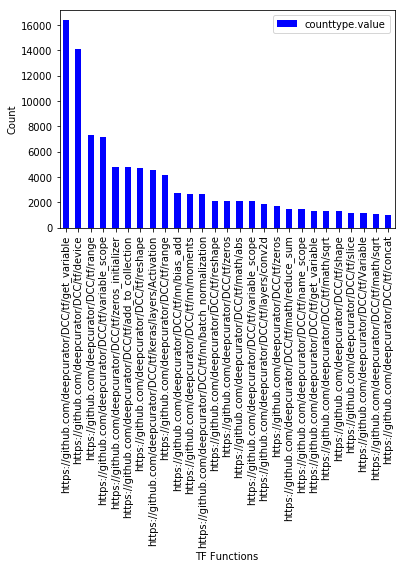

In [17]:
#### Function trends across years

functionyeartrends = """

Select count(?type) as ?counttype  ?type  ?year where {

?s <https://github.com/deepcurator/DCC/conferenceSeries> ?conference .
?s <https://github.com/deepcurator/DCC/yearOfPublication> ?year .
?s <https://github.com/deepcurator/DCC/hasRepository> ?repository .
?repository <https://github.com/deepcurator/DCC/hasFunction> ?y.
?y a ?type .
FILTER(!(STR(?type) = "https://github.com/deepcurator/DCC/UserDefined")).

}group by ?type ?year ORDER by DESC(?counttype)


"""

results_df = execute_query(functionyeartrends)
results_df.columns

results_df = results_df.drop(['counttype.datatype', 'year.type','counttype.type',  'type.type',
       ],axis=1)
results_df.head()
results_df["counttype.value"] = pd.to_numeric(results_df["counttype.value"])
results_df = results_df[results_df['counttype.value'] > 1000]
# results_df["year.value"] = pd.to_numeric(results_df["year.value"])
# results_df.groupby(['counttype.value','year.value']).size().unstack().plot(kind='bar',stacked='True',legend='False')

ax = results_df.plot(kind='bar',x='type.value',y='counttype.value',color='blue')
ax.set(xlabel = "TF Functions", ylabel = "Count")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'TF Functions')]

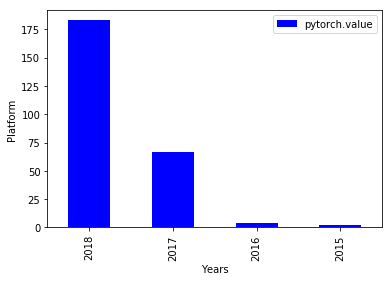

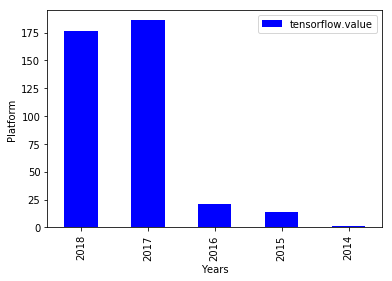

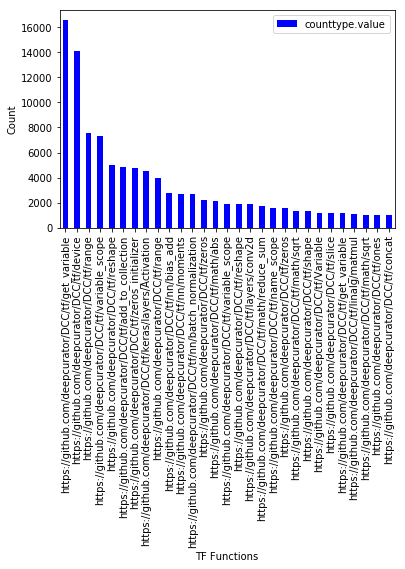

In [12]:
### Year and platform

platformyear = """

Select count(?platform) as ?countplatform ?platform ?year where {




In the next query we look at how Machine learning tasks use certain datasets across different ML publications.

In [18]:
## Given a particular machine learning task, what datasets would you recommend?

task_dataset_query  = """

Select  distinct ?task ?dataset where {


?publication <https://github.com/deepcurator/DCC/hasEntity> ?taskentity .
?publication <https://github.com/deepcurator/DCC/hasEntity> ?dataset.

?taskentity a <https://github.com/deepcurator/DCC/Task> .
?dataset a <https://github.com/deepcurator/DCC/Material> .

?taskentity <https://github.com/deepcurator/DCC/hasCSOEquivalent> ?task .

}group by ?task ?dataset

"""

task_dataset_query_analogous = """
Select  distinct ?tasktext ?datasettext where {


?publication <https://github.com/deepcurator/DCC/hasEntity> ?taskentity .
?publication <https://github.com/deepcurator/DCC/hasEntity> ?dataset.

?taskentity a <https://github.com/deepcurator/DCC/Task> .
?dataset a <https://github.com/deepcurator/DCC/Material> .


?taskentity <https://github.com/deepcurator/DCC/hasText> ?tasktext .
?dataset <https://github.com/deepcurator/DCC/hasText> ?datasettext .

}


"""


results_df = execute_query(task_dataset_query)
results_df.columns

results_df = results_df.drop(['dataset.type', 'task.type'],axis=1)
results_df.head()

,dataset.value,task.value
0,https://github.com/deepcurator/DCC/1806.07336v2_natural_language,https://cso.kmi.open.ac.uk/topics/information_retrieval
1,https://github.com/deepcurator/DCC/Kang_Convolutional_Neural_Networks_2014_CVPR_paper_image,https://cso.kmi.open.ac.uk/topics/optimization
2,https://github.com/deepcurator/DCC/7240-gans-trained-by-a-two-time-scale-update-rule-converge-to...,https://cso.kmi.open.ac.uk/topics/optimization
3,https://github.com/deepcurator/DCC/kusner17a_audio,https://cso.kmi.open.ac.uk/topics/optimization
4,https://github.com/deepcurator/DCC/7240-gans-trained-by-a-two-time-scale-update-rule-converge-to...,https://cso.kmi.open.ac.uk/topics/optimization


In [19]:

results_df = execute_query(task_dataset_query_analogous)
results_df.columns


results_df = results_df.drop(['datasettext.type', 'tasktext.type'],axis=1)
results_df.tail(20)


,datasettext.value,tasktext.value
760,text,machine_translation
761,parallel_text,recovery
762,text,recovery
763,image,transferring_knowledge
764,images,transferring_knowledge
765,image,constructions
766,rgb,recovery
767,mnist,learns
768,datasets,outlier_detection
769,image,outlier_detection


The following query shows the top ML methods for computer science tasks from the Knowledge graph.

In [20]:
method_task_query = """ 

Select  distinct ?method ?task where {


?publication <https://github.com/deepcurator/DCC/hasEntity> ?methodentity .
?publication <https://github.com/deepcurator/DCC/hasEntity> ?taskentity.

?taskentity a <https://github.com/deepcurator/DCC/Task> .
?methodentity a <https://github.com/deepcurator/DCC/Method> .

?methodentity <https://github.com/deepcurator/DCC/hasCSOEquivalent> ?method .
?taskentity <https://github.com/deepcurator/DCC/hasCSOEquivalent> ?task .

}group by ?method ?task


"""

results_df = execute_query(method_task_query)
results_df.columns

results_df = results_df.drop(['method.type', 'task.type'],axis=1)
results_df.head()

,method.value,task.value
0,https://cso.kmi.open.ac.uk/topics/q-learning,https://cso.kmi.open.ac.uk/topics/reinforcement_learning
1,https://cso.kmi.open.ac.uk/topics/mean_shift,https://cso.kmi.open.ac.uk/topics/superresolution
2,https://cso.kmi.open.ac.uk/topics/stochastic_gradient_descent,https://cso.kmi.open.ac.uk/topics/optimization
3,https://cso.kmi.open.ac.uk/topics/backpropagation_algorithm,https://cso.kmi.open.ac.uk/topics/optimization
4,https://cso.kmi.open.ac.uk/topics/recurrent_neural_networks,https://cso.kmi.open.ac.uk/topics/information_retrieval
